# How the Lyft Bay Wheels Program Revealed SF's Gender Ratio Problem
## by Jessica Li

## Investigation Overview

> This exploratory data analysis of the Lyft Bay Wheels bikesharing program investigates the male to female gender makeup of San Francisco and draws a comparison with gender trends in the Bay Area's prominent technology sector at large.

## Dataset Overview

> The [2017 Bay Wheels Bikesharing Data](https://www.lyft.com/bikes/bay-wheels/system-data) provided by Lyft contains anonymized trip information for over 500,000 bike rides in the year of 2017. [Bay Wheels](https://blog.lyft.com/posts/introducing-bay-wheels-new-bikes-and-a-new-name) is the latest hybrid e-bike offering by Lyft to get around the San Francisco Bay Area on two wheels. The program officially started on June 28, 2017. Bay Wheels, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass. In this analysis, we delve into how the bikesharing program fared from June 28 to December 31 of 2017, the first 6 months after this program was established. 

In [45]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [46]:
# Load the data into a pandas dataframe and preview the first few rows
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [47]:
# Convert data types
df['start_time'] = df['start_time'].astype('datetime64')
df['end_time'] = df['end_time'].astype('datetime64')
df['start_station_id'] = df['start_station_id'].astype('object')
df['end_station_id'] = df['end_station_id'].astype('object')
df['bike_id'] = df['bike_id'].astype('object')
df['user_type'] = df['user_type'].astype('category')
df['member_birth_year'] = df['member_birth_year'].astype('float')
df['member_gender'] = df['member_gender'].astype('category')

In [48]:
# Make a new column with member ages
df['member_age'] = 2019 - df['member_birth_year']

# Remove all rows where member age is over 68
df = df.query('member_age <= 68')

# Convert data type to integer
df['member_age'] = df['member_age'].astype('int')

In [49]:
# Make a new column with duration in unit of minutes
df['duration_min'] = df['duration_sec']/60

# Convert data type to integer
df['duration_min'] = df['duration_min'].astype(int)

In [50]:
# Make a new column: Start time as month (January - December)
df['start_time_month'] = df['start_time'].dt.strftime('%B')

# Make a new column: Start time as day (Monday - Sunday)
df['start_time_day'] = df['start_time'].dt.strftime('%a')

# Make a new column: Start time as hour (0 - 24)
df['start_time_hour'] = df['start_time'].dt.hour

## Overall Gender Makeup of Bay Wheels Users

> Around three quarters of Bay Wheels riders are male, leaving female riders in the remaining quarter. This 3:1 male to female ratio is more or less representative of the San Francisco general demographic makeup due to a disproportionate amount of males in the prominent technology industry in San Francisco.

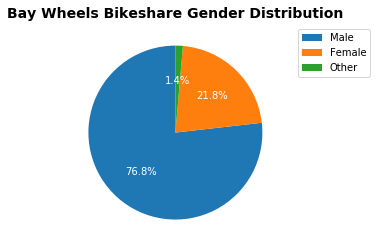

In [51]:
# Plot a pie chart of member gender

plt.pie(df.member_gender.value_counts(), startangle = 90, autopct= '%1.1f%%', textprops={'color':'white'})

plt.title('Bay Wheels Bikeshare Gender Distribution', fontsize=14, fontweight='bold')
plt.legend(['Male', 'Female', 'Other'], bbox_to_anchor=(1.04,1), loc="upper left")

plt.show()

## Bay Wheels User Type Hourly Usage Breakdown

> There appears to be a correlation between subscribers and the working adult demographic compared to customers and a more generic population group. Subscribers have a very apparent bivariate trend during the beginning and end of a work day, suggesting this group consists mostly of working adults. On the other hand, customers show a slight trend at the beginning and end of a day in general, with more usage during the mid afternoon as well. This suggests that the customer group likely has more transient segments such as tourists and non-working people. From this we conveniently have a demographic subset of the working adults in San Francisco.

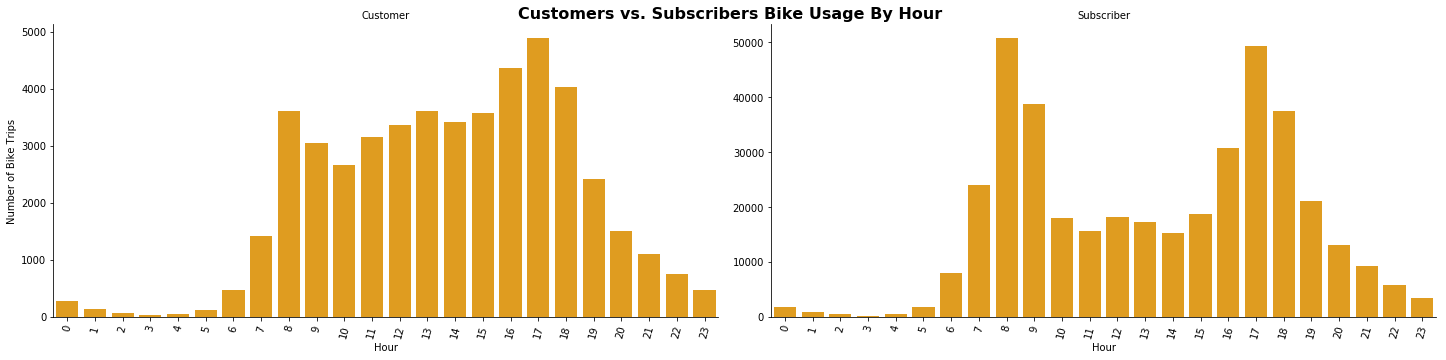

In [52]:
# Plot two bar charts comparing usage by hour for both user types

bar = sns.catplot(data=df, x = 'start_time_hour', col='user_type', 
                    kind='count', sharey = False, color = 'orange', 
                    aspect=2)

bar.set_titles('{col_name}', fontsize=14)
bar.set_axis_labels('Hour', 'Number of Bike Trips')
bar.fig.suptitle('Customers vs. Subscribers Bike Usage By Hour', fontsize=16, fontweight='bold')
bar.set_xticklabels(rotation=75)

plt.show()

## Bay Wheels User Type by Gender comparing Number of Trips

> Finally, we bring the gender ratio and user type trends together to reveal that the disproportionate male to female gender ratio is accentuated in the subscriber group that appears to capture a subset of the San Francisco working adult demographic. Roughly observing from the graph, it looks like the male to female ratio in the subscriber group is 5:1 whereas the customer group has a ratio of 3:1. San Francisco is notorious for its disproportionate amount of male to female coworkers. On the other hand, the customer group consisting of more demographic groups outside of the San Francisco working group may restore some gender makeup balance in the city.

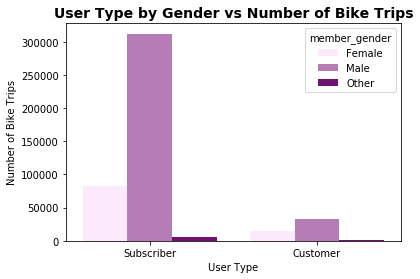

In [53]:
# Create a bar plot comparing subscriber vs customer, gender, and number of bike trips

bar = sns.countplot(data=df, x="user_type", hue="member_gender", 
                    color = 'purple', order=df.user_type.value_counts().index)

bar.set_title('User Type by Gender vs Number of Bike Trips', fontsize=14, fontweight='bold')
bar.set_xlabel('User Type')
bar.set_ylabel('Number of Bike Trips')

plt.show()

Personal Note: Insert this expression into the terminal or command line to view final output:

`jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`